# Project Understanding
This project is a clustering problem from several variables from customer such as annual income, spending score, age, and gender for customer segmentation purpose. In this project we will use k-means means for clustering problem. K-Means is chosen because it is efficient, interpretable, and well-suited for numerical features, making it a strong baseline for segmentation problems.

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans

# Load Data

In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
df = df.drop(columns=['CustomerID'])

# EDA

In [7]:
df_cat = df.select_dtypes(include='object')
df_num = df.select_dtypes(exclude='object')

In [39]:
def histplot_and_boxplot(df_num, column):
    fig, axes = plt.subplots(1,2, figsize=(10, 4))

    # Histogram
    sns.histplot(data=df_num, x=column, ax=axes[0])
    axes[0].set_title(f'{column} Distribution')
      
    # Boxplot
    sns.boxplot(data=df_num, y=column, width=0.4, ax=axes[1])
    axes[1].set_title(f'{column} Distribution')
    
    # Hitung Q1 dan Q3
    q1 = df_num[column].quantile(0.25)
    q3 = df_num[column].quantile(0.75)

    axes[0].axvline(q1, color='red', linestyle='--', label='Q1')
    axes[0].axvline(q3, color='blue', linestyle='--', label='Q3')

    # Tambahkan garis horizontal di Q1 dan Q3
    axes[1].axhline(q1, color='red', linestyle='--', label='Q1')
    axes[1].axhline(q3, color='blue', linestyle='--', label='Q3')
    
    # Tambahkan teks label di samping garis
    axes[1].text(x=-0.4, y=q1, s=f'Q1 = {q1:.2f}', color='red', 
                 va='bottom', ha='left', fontsize=9)
    axes[1].text(x=-0.4, y=q3, s=f'Q3 = {q3:.2f}', color='blue', 
                 va='bottom', ha='left', fontsize=9)
    
    axes[0].legend()
    axes[1].legend()

    plt.tight_layout()
    plt.show()


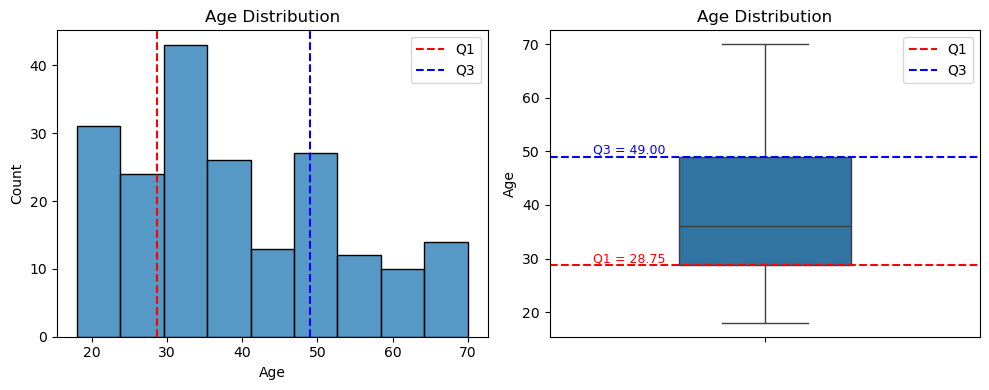

In [33]:
histplot_and_boxplot(df_num, 'Age')

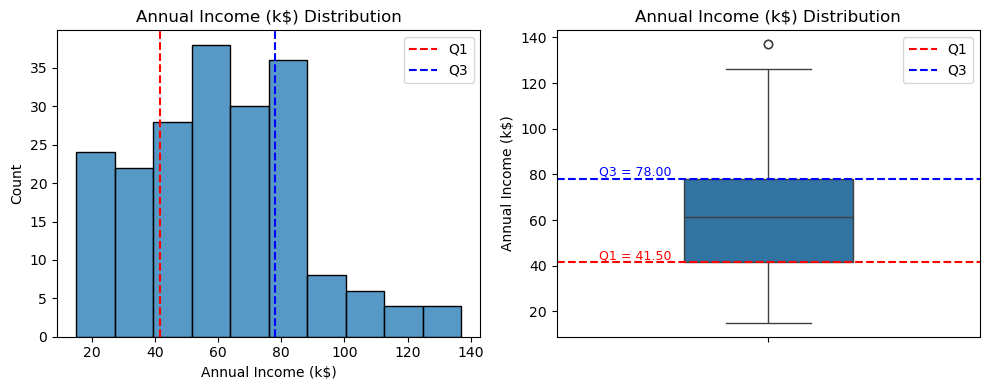

In [34]:
histplot_and_boxplot(df_num, 'Annual Income (k$)')

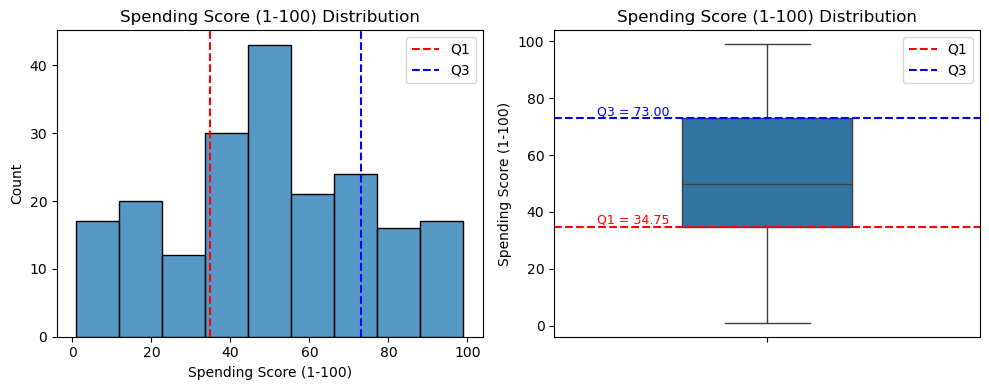

In [35]:
histplot_and_boxplot(df_num, 'Spending Score (1-100)')

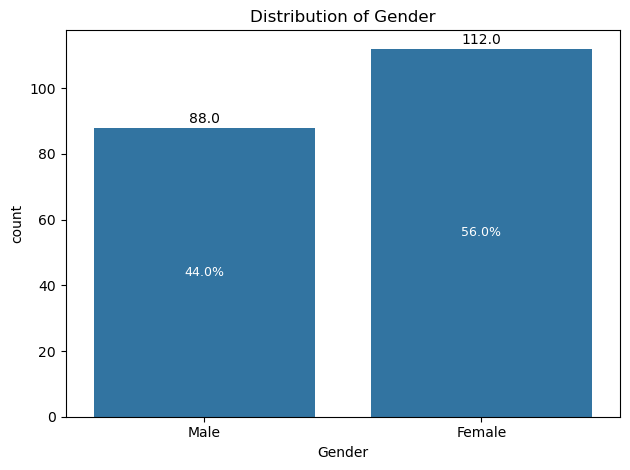

In [45]:
ax = sns.countplot(data = df_cat, x='Gender')
total = len(df_cat['Gender'])
for p in ax.patches:
    count = p.get_height() 
    pct = 100 * count / total 
    # X and Y coordinates for text 
    x = p.get_x() + p.get_width() / 2 
    y = p.get_height() 
    # Place count above bar 
    ax.text(x, y + 0.5, f'{count}', ha='center', va='bottom', fontsize=10, color='black') 
    ax.text(x, y/2, f'{pct:.1f}%', ha='center', va='center', fontsize=9, color='white')

plt.title('Distribution of Gender')

plt.tight_layout()
plt.show()


- The majority of the age distribution (50%) comes from range 28-49.
- The majority of the Annual Income (k$) distribution (50%) comes form range 41-78.
- The majority of the Spending Score (1-100) distribution (50%) come form range 34-73.
- For numerical features, all the feature is not in normal distribution shape, and the annual income feature contains outlier in this data. So we will use robust scaling for scalling numerical features for modelling so the effect of the outlier can be minimize.
- The majority of the gender distribution (56%) come from Female gender. 
- For categorical feature, we found imblance data between gender male and female, but it was normal and we do not to do any additional process.

# Feature Engineering 

## Feature Encoding

In [13]:
df_cat = pd.get_dummies(df_cat, columns=['Gender'], drop_first=True)

## Feature Scalling

In [14]:
scaler = RobustScaler()

In [15]:
scaler.fit(df_num)

RobustScaler()

In [16]:
df_num[df_num.columns] = scaler.transform(df_num)

In [17]:
df = df_num.copy()

In [18]:
df[df_cat.columns] = df_cat

# Modelling

In this section first we will find the number of cluster that we will use for this model. The range of cluster that we will test is in 1-10 and evaluate each model by calculating its inertia. The goal is to identify the elbow point in the inertia curve, where the rate of decrease slows down, indicating the most suitable number of clusters.

In [19]:
k = range(1, 10)
inertia = [] 
for i in k:
    model = KMeans(n_clusters = i, max_iter = 1000, random_state=0) # jumlah cluster akan di loop sebanyak k range(9 times)
    model.fit(df)
    inertia.append(model.inertia_)

C:\Users\GF63\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\GF63\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\GF63\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\GF63\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_

<Axes: >

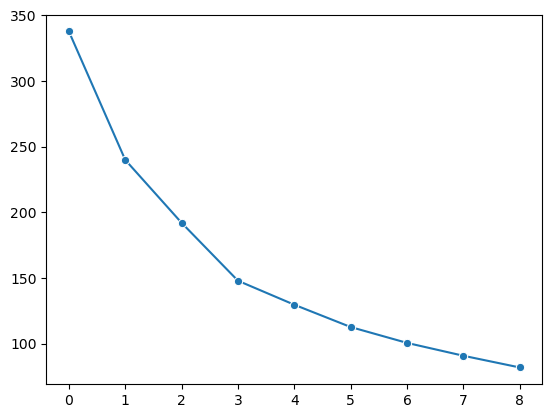

In [20]:
sns.lineplot(data=inertia, marker='o')

In [21]:
for i,j in enumerate(inertia):
    print(f'Iterasi {i} - inertia = {j}')

Iterasi 0 - inertia = 337.7211135777369
Iterasi 1 - inertia = 239.9296048013914
Iterasi 2 - inertia = 192.0173296400808
Iterasi 3 - inertia = 147.92642990625725
Iterasi 4 - inertia = 129.64981270793805
Iterasi 5 - inertia = 112.67288699497328
Iterasi 6 - inertia = 100.5954863771527
Iterasi 7 - inertia = 90.80933570144003
Iterasi 8 - inertia = 81.8925172000528


- n_cluster = 3

In [22]:
model_km = KMeans(n_clusters=3, random_state=42)

In [29]:
model_km.fit(df)

C:\Users\GF63\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=42)

In [30]:
df['cluster_km'] = model_km.predict(df)

In [33]:
df[df_num.columns] = scaler.inverse_transform(df[df_num.columns])

In [34]:
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male,cluster_km
0,19.0,15.0,39.0,True,0
1,21.0,15.0,81.0,True,0
2,20.0,16.0,6.0,False,0
3,23.0,16.0,77.0,False,0
4,31.0,17.0,40.0,False,0


In [35]:
df_male = df[df['Gender_Male'] == True]
df_female = df[df['Gender_Male'] == False]

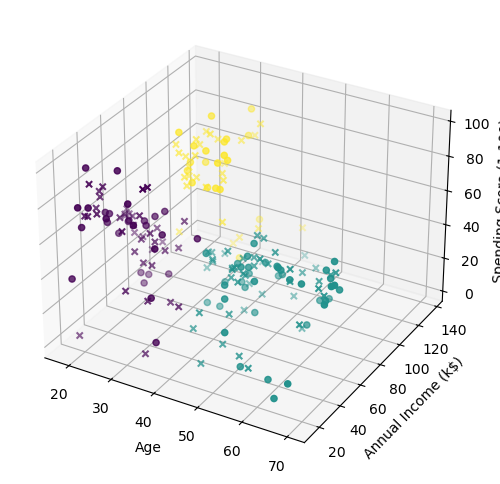

In [36]:
fig = plt.figure(figsize=(8, 6))
# 'projection="3d"' is the key argument to enable 3D plotting
ax = fig.add_subplot(111, projection='3d') 

ax.scatter(df_male['Age'], df_male['Annual Income (k$)'], df_male['Spending Score (1-100)'], c=df_male['cluster_km'], cmap='viridis', marker='o')
ax.scatter(df_female['Age'], df_female['Annual Income (k$)'], df_female['Spending Score (1-100)'], c=df_female['cluster_km'], cmap='viridis', marker='x')

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')

plt.show()